# 📊 Data Analysis and Visualization Assignment

## Objective
- Load and analyze a dataset using **pandas**.
- Perform simple data exploration and cleaning.
- Create plots using **matplotlib** and **seaborn**.
- Document findings and observations.


## Task 1: Load and Explore the Dataset
We will use the **Iris dataset**, a classic dataset for classification problems.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Make plots look nicer
sns.set(style="whitegrid")

# Load dataset
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Inspect dataset structure
print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

# Drop missing values if any
df = df.dropna()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## Task 2: Basic Data Analysis
We compute summary statistics and perform a grouping operation.


In [4]:
# Basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
# Grouping: mean petal length per species
grouped = df.groupby("target")["petal length (cm)"].mean()
grouped

target
0    1.462
1    4.260
2    5.552
Name: petal length (cm), dtype: float64

## Task 3: Data Visualization
We will create four different plots:
1. Line chart
2. Bar chart
3. Histogram
4. Scatter plot


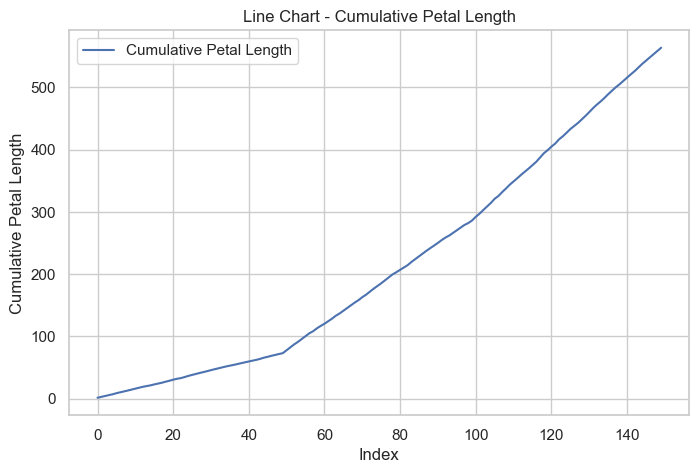

In [6]:
# 1. Line chart - Cumulative petal length
df["cumulative_petal_length"] = df["petal length (cm)"].cumsum()
plt.figure(figsize=(8,5))
plt.plot(df.index, df["cumulative_petal_length"], label="Cumulative Petal Length")
plt.title("Line Chart - Cumulative Petal Length")
plt.xlabel("Index")
plt.ylabel("Cumulative Petal Length")
plt.legend()
plt.show()

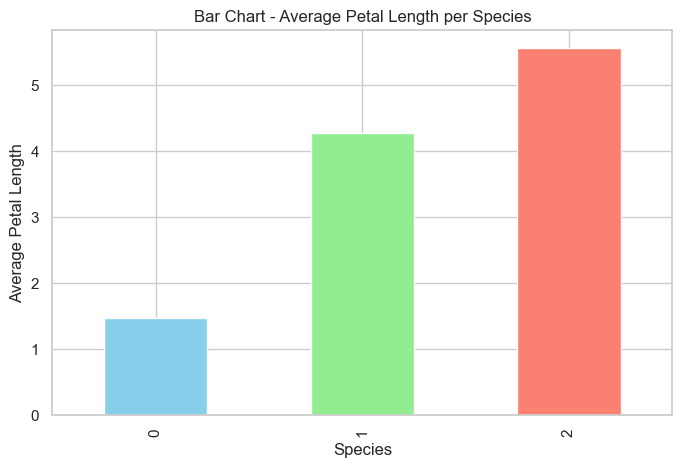

In [7]:
# 2. Bar chart - Average petal length per species
plt.figure(figsize=(8,5))
grouped.plot(kind="bar", color=["skyblue", "lightgreen", "salmon"])
plt.title("Bar Chart - Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length")
plt.show()

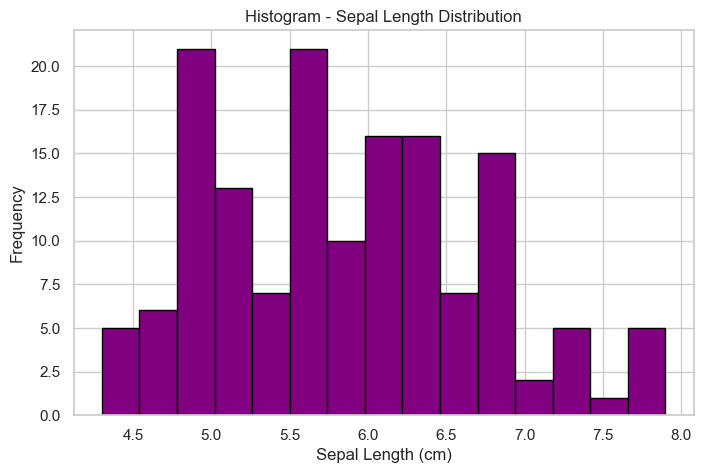

In [8]:
# 3. Histogram - Sepal Length Distribution
plt.figure(figsize=(8,5))
plt.hist(df["sepal length (cm)"], bins=15, color="purple", edgecolor="black")
plt.title("Histogram - Sepal Length Distribution")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

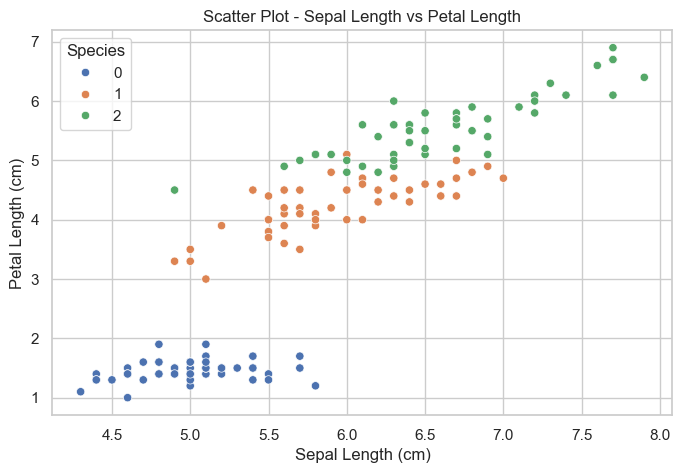

In [9]:
# 4. Scatter plot - Sepal Length vs Petal Length
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="sepal length (cm)", 
    y="petal length (cm)", 
    hue="target", 
    palette="deep", 
    data=df
)
plt.title("Scatter Plot - Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()

## Findings / Observations
- Different species show distinct average petal lengths, which is useful for classification.
- Sepal length distribution is fairly normal.
- Scatter plot reveals clear separation between species based on petal and sepal lengths.
- The cumulative line chart increases steadily as expected.
